# Dataset Settings

In [5]:
# to load images from google drive
from google.colab import drive
drive.mount('/content/drive')

# Pre-requisites

In [6]:
%%capture
! git clone https://github.com/kar-ab/image_similarity
! pip3 install -r ./image_similarity/requirements.txt
! gdown --id 15P4cYyZ2Sd876HKAEWSmeRdFl_j-0upi
! wget https://raw.githubusercontent.com/AlexeyAB/darknet/master/data/coco.names

# Yolov4 - Object Detection

In [1]:
import os
import pickle
import argparse

os.chdir('/content/image_similarity/')
from deduplicate import ImageSimilarity

dataset_path = '/content/drive/MyDrive/c23/*.png'

image_similarity = ImageSimilarity(dataset_path,'/content/coco.names', '/content/yolov4.weights')

# pre-loading object detections for the images
with open('./c23_list_obj_det.pkl', 'rb') as f:
  list_obj_det = pickle.load(f)

image_similarity.list_obj_det = list_obj_det

# or running detections on all images, will take sometime to run detections on all images, instead use the given list
# image_similarity.list_obj_det = image_similairty.run_obj_det()

# Compare Two Images for Similarity

BBs are not similar, so Images are also not similar
Images similarity score: 0


Text(0.5, 1.0, 'Image index.481')

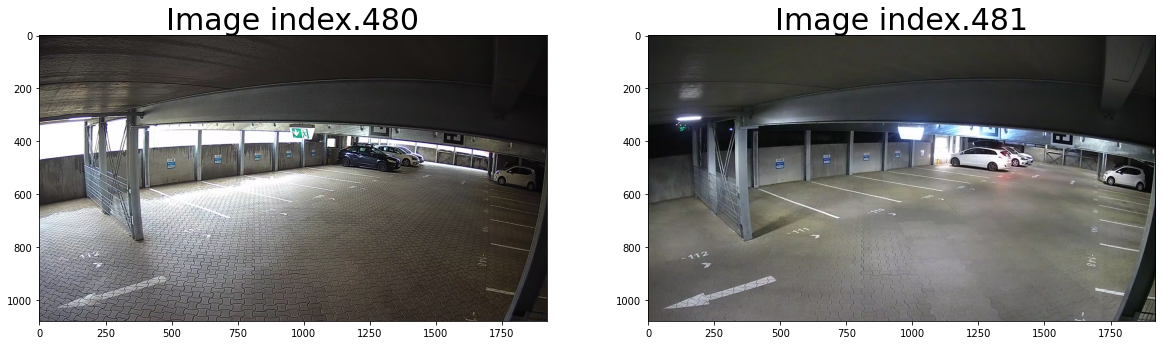

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import glob 

idx_1 = 480
idx_2 = 481
ssim_im_thres = 0.8
ssim_bb_thres = 0.5

similarity_score = image_similarity.compare_two_images(idx_1, idx_2, ssim_im_thres, ssim_bb_thres)
print('Images similarity score:', similarity_score)

image_list =  sorted(glob.glob(dataset_path))
img1 = cv2.cvtColor(cv2.imread(image_list[idx_1]), cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(cv2.imread(image_list[idx_2]), cv2.COLOR_BGR2RGB)

f, (ax1) = plt.subplots(1, 2, figsize=(20,8))
ax1[0].imshow(img1)
ax1[0].set_title('Image index.'+ str(idx_1), fontsize=30)
ax1[1].imshow(img2)
ax1[1].set_title('Image index.'+ str(idx_2), fontsize=30)

# Query an Image for finding similar Images from dataset

In [12]:
query_idx = 480
ssim_im_thres = 0.8
ssim_bb_thres = 0.5
similar_imgs = image_similarity.Query_search(query_idx, ssim_im_thres, ssim_bb_thres)
print(similar_imgs)

The queried image index is unique
[480]


# Get list of unique images from Dataset

In [4]:
ssim_im_thres = 0.8
ssim_bb_thres = 0.5
image_similarity.deduplicate_dataset(ssim_im_thres, ssim_bb_thres)